![Group 1](Group%201.png)
**Analyzer:** Strashenko Anna
strashenkoanna@gmail.com

# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

In [1]:
# SETUP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## Information about DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

# 1. What is the most common primary diagnosis by age group?

## Analysis and plotting

To identify the most common primary diagnosis for age groups, we will build a count plot.

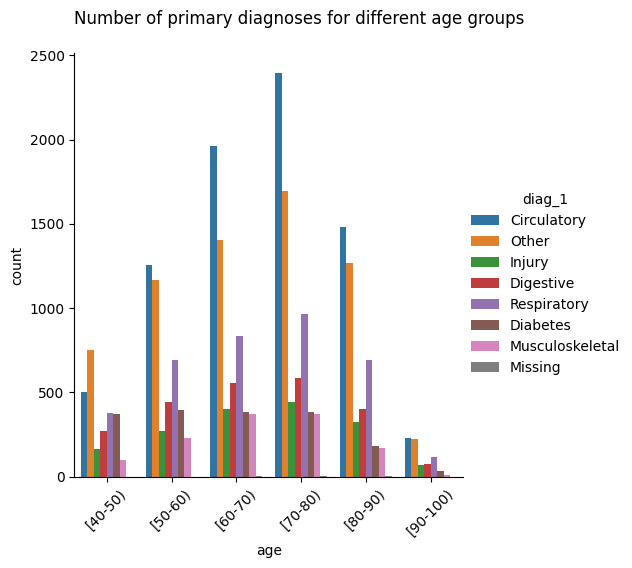

In [20]:
order_age = ['[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
g = sns.catplot(x='age', data=df, kind='count', hue='diag_1', order=order_age)
g.fig.suptitle('Number of primary diagnoses for different age groups', y=1.05)
plt.xticks(rotation=45)
plt.show()

## Insight

Judging by the graph, the most common primary diagnosis among all age groups (with the exception of young people [40-50)) is Circulatory. With the exclusion of the Other group of diagnoses from the analysis, it can be argued that for all age groups, the most common primary diagnosis is Circulatory. This diagnosis is especially common in people whose age is [70-80].

# 2. Effect of a diabetes diagnosis on readmission rates

## Analysis and plotting

To analyze the impact of diabetes on re-hospitalization, we will select all patients diagnosed with Diabetes

In [5]:
have_diabetes = df[['diag_1', 'diag_2', 'diag_3']].isin(['Diabetes']).agg(np.sum, axis=1).astype(bool)
df[have_diabetes]

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
12,[70-80),8,67,0,21,0,0,0,Other,Diabetes,Circulatory,Other,no,normal,no,yes,no
14,[80-90),2,73,1,26,0,0,0,InternalMedicine,Circulatory,Other,Diabetes,no,no,no,yes,no
16,[70-80),3,52,0,10,0,0,0,Other,Circulatory,Other,Diabetes,no,no,no,yes,yes
18,[40-50),7,72,0,13,0,0,0,InternalMedicine,Diabetes,Other,Other,no,high,no,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24987,[80-90),8,34,2,13,0,1,0,Missing,Other,Circulatory,Diabetes,no,no,no,yes,no
24990,[50-60),1,15,1,10,0,0,0,Surgery,Musculoskeletal,Diabetes,Circulatory,no,no,no,no,no
24992,[50-60),1,35,5,18,0,0,0,Cardiology,Circulatory,Circulatory,Diabetes,no,no,no,no,no
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


Visualize data on how many repeated hospitalizations there were in patients diagnosed with Diabetes

Text(0.5, 1.05, 'The number of repeated hospitalizations of patients diagnosed with Diabetes')

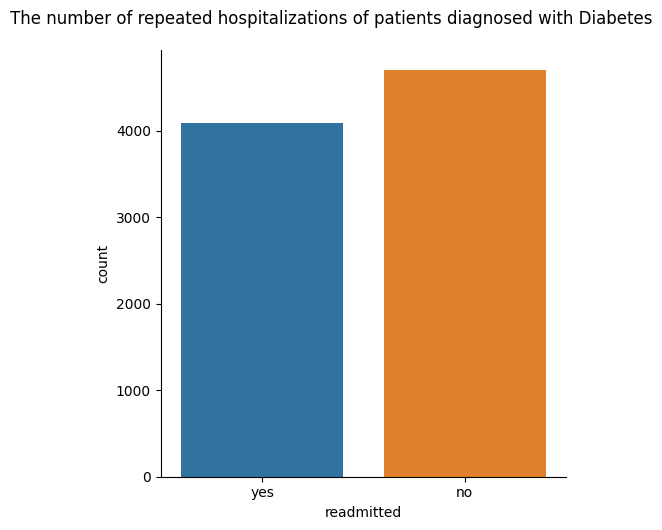

In [6]:
g = sns.catplot(x='readmitted', data=df[have_diabetes], kind='count')
g.fig.suptitle('The number of repeated hospitalizations of patients diagnosed with Diabetes', y=1.05)

In [141]:
percent_diabets_readmitted = (df[have_diabetes]['readmitted'].replace({'no': 0, 'yes': 1}).sum() / len(df[have_diabetes]['readmitted'])).round(2)
print(f'Percentage of re-hospitalized patients diagnosed with Diabetes: {percent_diabets_readmitted}%')

Percentage of re-hospitalized patients diagnosed with Diabetes: 0.47%


## Insight

Judging by the schedule, it can be concluded that there is an impact of diabetes on re-hospitalization, but it is small, since only 47% of diabetics were re-hospitalized. It can be concluded that diabetes does not play a central role in re-hospitalization.

# On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## Analysis

To get information about the impact of the diagnosis on re-hospitalization, we will calculate the percentage of hospitalized patients for each diagnosis

In [154]:
diagnosis_readmission = df.melt(id_vars='readmitted', value_vars=['diag_1', 'diag_2', 'diag_3'])
diagnosis_readmission.replace({'no': 0, 'yes': 1}, inplace=True)
group_diagnosis = diagnosis_readmission.groupby('value')['readmitted']
readmission_rate = (group_diagnosis.agg(np.sum) / group_diagnosis.count()).sort_values(ascending=False)
print(readmission_rate)

value
Respiratory        0.492028
Circulatory        0.481898
Diabetes           0.467467
Digestive          0.466098
Other              0.463607
Injury             0.427784
Musculoskeletal    0.420534
Missing            0.309917
Name: readmitted, dtype: float64


## Insight

According to the data obtained, it is clear that patients with respiratory diseases are most susceptible to re-hospitalization, almost 50%. Patients with a Circulatory diagnosis also have a high percentage of being re-hospitalized.